## Project: Finding Donors for *CharityML*
#### Done by: Mays Hawwa

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
sns.set(style="whitegrid")

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
# Investigation of outcome feature
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [3]:
# Investigation of outcome feature
data.groupby('income').count()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
income,,,,,,,,,,,,,
<=50K,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014
>50K,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208


In [4]:
# Investigation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [5]:
# Checking for missing values
data.isnull().values.any()

False

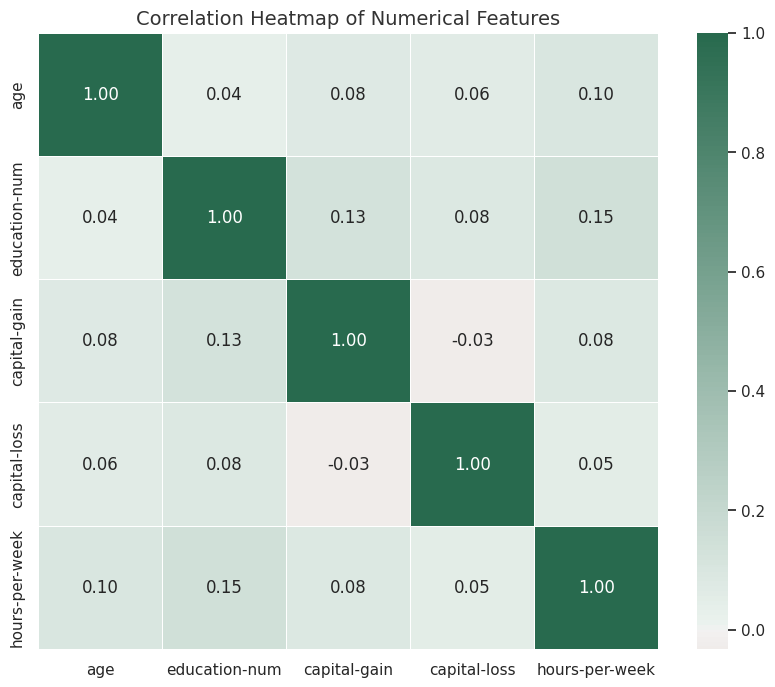

In [6]:
# Select only numerical columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_data.corr()

# Define a custom colormap (Dark Orange -> Light Green -> Medium Purple)
custom_cmap = sns.diverging_palette(30, 150, s=80, l=40, as_cmap=True)  # Adjusted to fit the requested colors

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=custom_cmap, fmt=".2f", 
            xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.5, center=0)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, color="#333")
plt.show()

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**HINT:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [7]:
# TODO: Total number of records
n_records = data.shape[0]

# Get value counts and store in a variable
income_counts = data['income'].value_counts()

# Access values correctly
n_greater_50k = income_counts.iloc[0]  # First most common value
n_at_most_50k = income_counts.iloc[1]  # Second most common value

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k / n_records * 100, 1)

# Print the results
print("Total number of records --> {}".format(n_records))
print("Individuals making more than $50,000 --> {}".format(n_greater_50k))
print("Individuals making at most $50,000 --> {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000 --> {}%".format(greater_percent))

Total number of records --> 45222
Individuals making more than $50,000 --> 34014
Individuals making at most $50,000 --> 11208
Percentage of individuals making more than $50,000 --> 75.2%


**Featureset Exploration**

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data

### Transforming Skewed Continuous Features

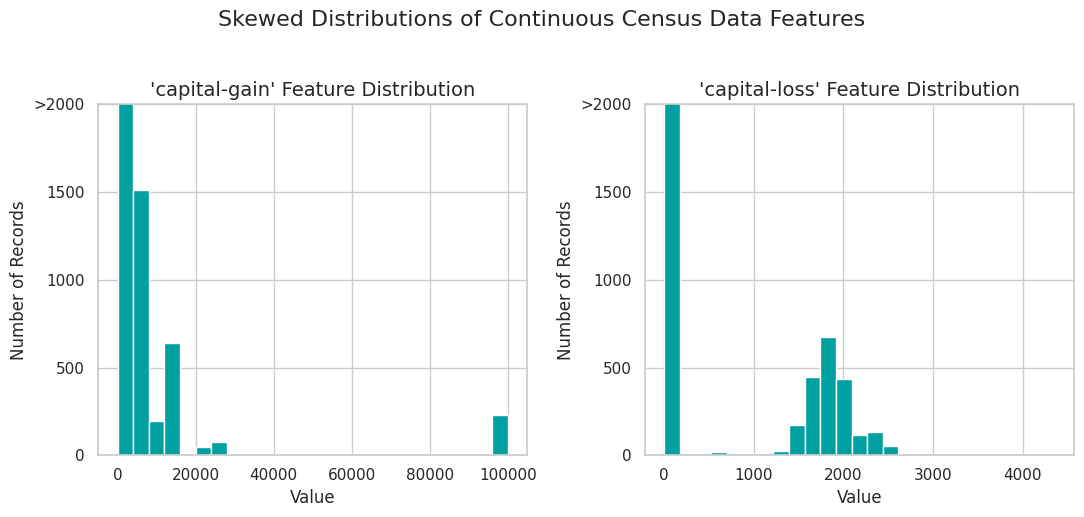

In [8]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

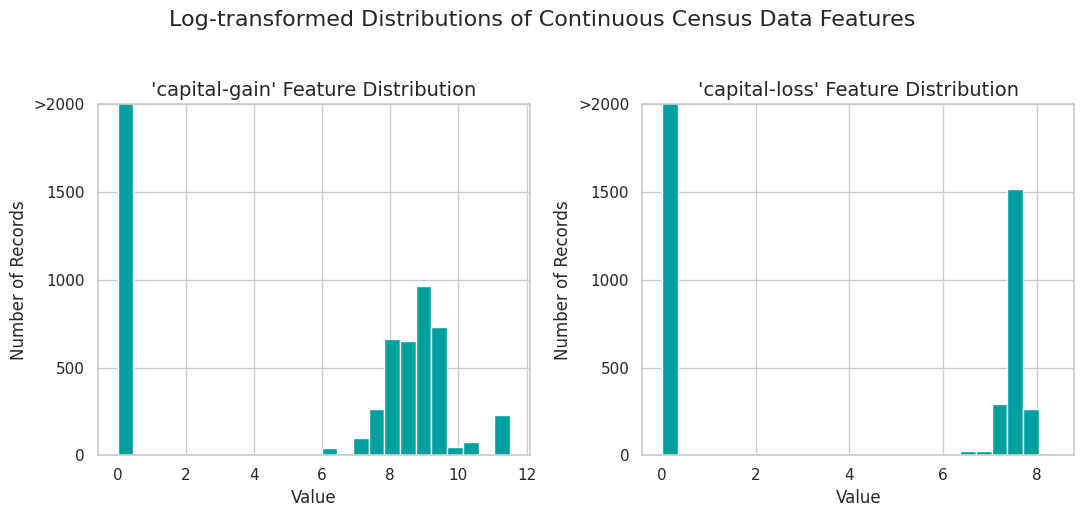

In [9]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [10]:
#Investigation of some columns with impact of log transformations
features_log_transformed[features_log_transformed['capital-gain'] > 0][:5]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,9.552866,0.0,50.0,United-States
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552367,0.0,40.0,United-States
55,30,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,8.519989,0.0,40.0,United-States
56,30,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7.786552,0.0,40.0,United-States


In [11]:
#Investigation of some columns with impact of log transformations
features_log_transformed[features_log_transformed['capital-loss'] > 0][:5]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22,43,Private,11th,7.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,7.622175,40.0,United-States
30,45,Private,Bachelors,13.0,Divorced,Exec-managerial,Own-child,White,Male,0.0,7.250636,40.0,United-States
48,47,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,7.551187,60.0,Honduras
88,48,Self-emp-not-inc,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,7.551187,60.0,United-States
103,56,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,7.543273,50.0,Canada


### Normalizing Numerical Features

In [12]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`:

|   | someFeature |                    
| :-: | :-: |                            
| 0 |  B  |  
| 1 |  C  |
| 2 |  A  |  

We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`:

|| someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: | :-: | :-: |
|0| 0 | 1 | 0 |
|1| 0 | 0 | 1 |
|2| 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [13]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(data=features_log_minmax_transform, columns=['workclass','education_level',\
                                'marital-status','occupation','relationship','race','sex','native-country'])

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.


In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has --> {} samples.".format(X_train.shape[0]))
print("Testing set has --> {} samples.".format(X_test.shape[0]))

Training set has --> 36177 samples.
Testing set has --> 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

# Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

**Please note** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

**HINT:** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision (True Positives / (True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score (True Positives / (True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [15]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
accuracy = np.sum(income) / income.count() 
recall = np.sum(income) / np.sum(income)
precision = np.sum(income) / (np.sum(income)+(income.count()-np.sum(income)))

#accuracy = n_greater_50k / n_records
#recall = n_greater_50k / n_greater_50k
#precision = n_greater_50k / (n_greater_50k + n_at_most_50k)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = ((1+(beta**2)) * precision * recall) / (((beta**2)*precision)+recall)

# Print the results
print("Naive Predictor -- > [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor -- > [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**HINT:**

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer:**

**AdaBoost** -- > is a highly accurate classifier created by combining many relatively weak and inaccurate classifiers and is often referred to as the "best" out-of-the-box classifier, ie no tuning of hyperparameters is needed to obtain good classification. Real-world applications include facial recognition software, in video game software (the AdaBoost classifier is used in Call of Duty) and in search engine software, yahoo search engine for example.

Its strengths are good results without any parameter tweaking, and performs very well in practice, real-world scenarios. And if the parameters do need tweaking there are only a few to tweak. This makes it very simple to implement. It is also adaptive, in the sense it constructs strong models sequentially and each model tries to correct the mistakes of the previous one, hence the name AdaBoost. It also selects only those features known to improve the predictive power of the model, reducing the dimensionality and potentially improving executing time as irrelevant features are ignored. When a dataset contains low noise it is also resistant to overfitting.

Its weaknesses are it is sensitive to noisy data and outliers, so the dataset must be cleaned before use. You need to indicate a termination condition, ie set the number of estimators before training the algorithm. As the complexity of the classification increases with multiclasses, or imbalanced classes, then adjustments need to be made to the AdaBoost Classifier. It is also difficult to implement on a real-time platform.

**Gradient boosting** -- > is a gradient descent algorithm typically used with decision trees and like AdaBoost is part of the group of Classifiers known as Ensemble Methods. It is used in real-world applications in robotics and text classification and is very suitable for text classification due to the fact it works well when predictor data comes from a very high dimensional distribution whilst containing very little, sparsely distributed information. I also found an article relating GBDT being used as a risk management tool in finance to predict firm failures.

Its strengths are various classes of weak learners can be used and like AdaBoost it builds its decision trees one level at a time, where each new tree helps to correct errors made by the previously trained tree, thus resulting often in shallow trees and better performance than other classifiers.

Its weaknesses include GBDT's are prone to overfitting, but this can be reduced by using regularization techniques. Due to the sequential nature of the tree building, it takes longer to train than classifiers like random forests that train the trees in one pass. GBDTs are also sensitive to noisy data and extreme values and a stopping value needs to be given.

**SVMs** --> are used in a wide range of real-world applications from prediction of common diseases, breast cancer prediction, protein-structure detection, face detection, handwriting recognition and text and hypertext categorization. In facial detection – SVMs classify parts of the image as a face and non-face and create a square boundary around the face.

Its strengths are it is very good when we have no idea on the data. Not only does it aim to classify the data, but also aims to find the best possible boundary. It works well with even unstructured and semi-structured data like text, images and trees. The kernel trick is the real strength of SVM, as with an appropriate kernel function, we can solve any complex problem. It scales relatively well to high dimensional data. SVMs have a parameter for regularization, which makes the user think about overfitting.

Its weaknesses are choosing a “good” kernel function is not easy. For large datasets it requires long training times and is inefficient. It is difficult to understand and interpret the final model, variable weights and individual impact. Since the final model is not so easy to see, we can not do small calibrations to the model hence its tough to incorporate business logic.

I firstly, chose the Adaboost classifier because it was an Ensemble Method, which is suitable as shown in the scikit cheat sheet, and regarded as one of the best out-of-the-box performers. I then chose Gradient Boosting, another Ensemble Method and thus suitable for the dataset, as I have seen variants of this algorithm are often winners in Kaggle competitions, and so was expecting this to be the best performer. Finally for comparative purposes I chose a different type of algorithm the Support Vector Machine, a SVC indicated as suitable by scikit-learn.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [16]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score 

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

AdaBoostClassifier trained on 723 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 723 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SVC trained on 723 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


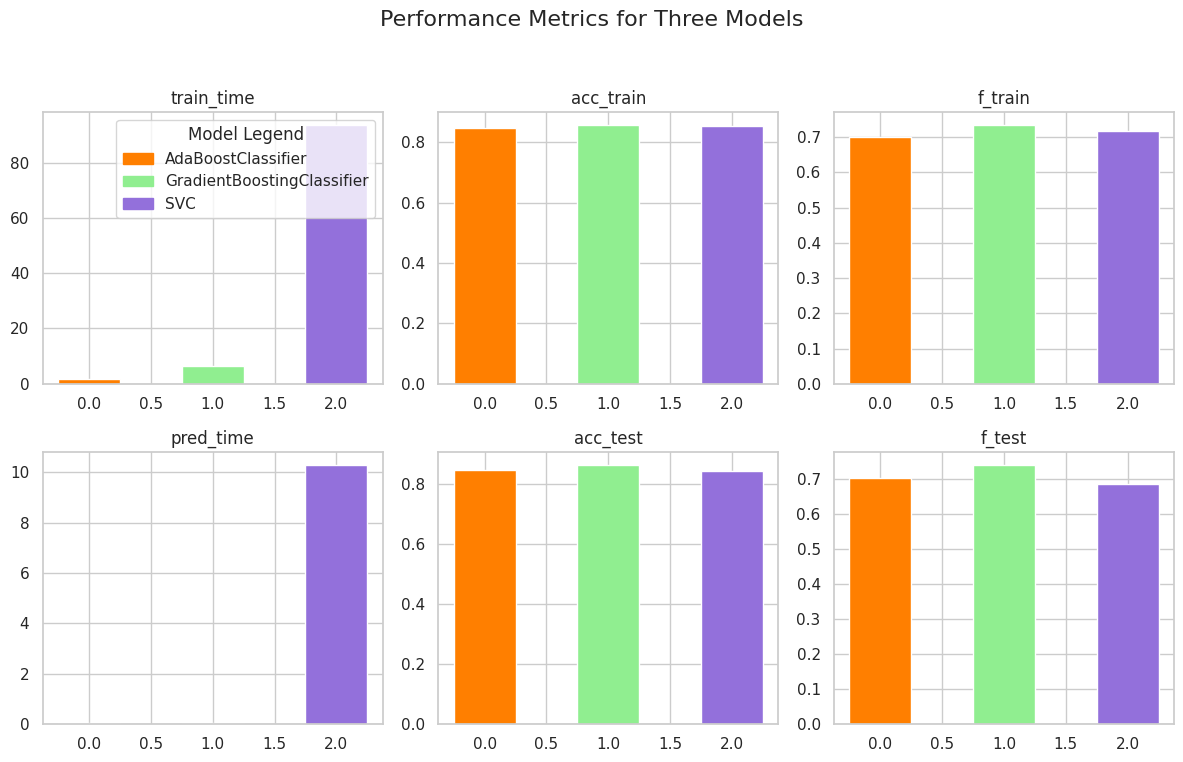

In [17]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress unnecessary warnings

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(algorithm="SAMME", random_state=42)  # Fixes FutureWarning issue
clf_B = GradientBoostingClassifier(random_state=42)
clf_C = SVC(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.02)  # Increased to 2% to avoid division by zero

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}

    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Fix visuals.py indexing issue by ensuring integer division
def fixed_evaluate(results, accuracy, f1):
    
    # Define color palette (Dark Orange, Light Green, Medium Purple)
    colors = ['#FF7F00', '#90EE90', '#9370DB']  # Dark Orange, Light Green, and Medium Purple
    model_names = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'SVC']

    # Set up the figure
    fig, ax = plt.subplots(2, 3, figsize=(12, 8))  
    fig.suptitle("Performance Metrics for Three Models", fontsize=16)

    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            row = j // 3  # Fix indexing issue
            col = j % 3
            ax[row, col].bar(k, results[learner][2][metric], color=colors[k], width=0.5)
            ax[row, col].set_title(metric)
        
    # Adding a legend to show which color corresponds to which model
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
    ax[0, 0].legend(handles, model_names, loc='upper right', title="Model Legend")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Run metrics visualization for the three supervised learning models chosen
fixed_evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

**HINT:** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer:**

The best performing model from the 3 chosen with regards the task of identifying individudals who make more than $50,000 was the **Gradient Boosting Classifier**. On the 100% testing dataset, it returned an Accuracy Score of over 80% just slightly higher than the AdaBoost Classifier and SVC Classifier. But more importantly it also produced the highest F-score around 75%, which was a slightly greater performance on AdaBoost compared to the Accuracy Score but significantly better F-score compared to the SVC Classifier. Gradient Boosting Classifier actually outperformed the other two classifiers in each of the sample sizes.

Gradient Boosting required a 10% longer training time compared to AdaBoost, however this was still only around 10 seconds on 36,177 samples and the predicting time was equal, so this wouldn't impact the use for finding donors for CharityML. The SVC Classifier was much slower at training and making predictions on the testing data, around 105 seconds for training and 17.5 seconds for predicting.

Gradient Boosting is suitable for CharityML as it was the most precise and accurate with the training and testing data, and there is no issue with regards timing. It is also suitable as the data doesn't have thousands of features and lots of sparse values, and there doesn't seem to be a high level of noise or extreme values.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

**HINT:**

When explaining your model, if using external resources please include all citations.

**Answer:** 

The model we are recommending is the Gradient Boosting Classifier, which comes from the Ensemble Method models in Machine Learning. This group of models uses a combination of a bunch of different learning algorithms, hence ensemble, to produce a better prediction than each of the individual algorithms. The individual algorithms on their own make predictions on the data which is just slightly better than guessing, thus they are often referred to as "weak" learners, but when they are combined all together they form an accurate predicting tool. The model used for the "weak" learners are usually decision trees, but there is the possibility to add other types of model.

This works by taking the first "weak" learner and fitting it to the data maximizing the accuracy and minimizing the number of errors. So, if you imagine all the data is plotted on a chart and the decision tree algorithm is creating the best split of the data that gives '>50K', but can only use a line or plane through all the variables/features so it is unable to make a perfect split, there will be some errors.

Then, the second "weak" learner, needs to fix the errors of the first one whilst also maximizing its accuracy and minimizing its number of errors using only a line or plane. The third "weak" learner carries on this process, fixing the errors of the previous algorithm whilst trying to maximize its own accuracy and minimize its own errors and through this process, the different planes created by the algorithms are combined and bent to fit the dataset in order to be able to categorize by giving weights to what features of the data will give rise to a person falling in the '>50K' income bracket.

And this is how it will predict on new census data.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [18]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score

# Initialize the classifier
clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid (reduced for efficiency)
parameters = {
    'learning_rate': [0.1, 0.15, 0.2],
    'n_estimators': [200, 350, 500],
    'max_depth': [2, 3, 4]
}

# Create an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

In [19]:
import time

# Start timing
start = time.time()

In [20]:
# Perform Randomized Search
random_search = RandomizedSearchCV(
    clf,
    param_distributions=parameters,
    scoring=scorer,
    cv=3,       # Reduced to 3 folds for speed
    n_iter=5,   # Only tries 5 random combinations
    n_jobs=-1,  # Use all available processors
    random_state=42
)

In [21]:
# Fit to training data
random_search.fit(X_train, y_train)

# Get the best model
best_clf = random_search.best_estimator_

# Make predictions using the unoptimized model
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Make predictions using the optimized model
best_predictions = best_clf.predict(X_test)

In [22]:
# End timing
end = time.time()

In [23]:
# Report scores
print("Unoptimized Model\n < ------ >")
print("Accuracy score on testing data -- > {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data -- > {:.4f}".format(fbeta_score(y_test, predictions, beta=0.5)))

print("\nOptimized Model\n < ------ >")
print("Final accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on testing data -- > {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))

# Time taken
print("\nTime taken -- > {:.2f} minutes".format((end - start) / 60))

# Best Model Parameters
print("\nBest Model -- >")
print(best_clf)

Unoptimized Model
 < ------ >
Accuracy score on testing data -- > 0.8630
F-score on testing data -- > 0.7395

Optimized Model
 < ------ >
Final accuracy score on testing data: 0.8715
Final F-score on testing data -- > 0.7547

Time taken -- > 3.40 minutes

Best Model -- >
GradientBoostingClassifier(learning_rate=0.15, n_estimators=350,
                           random_state=42)


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |                   |                 |
| F-score        |                   |   EXAMPLE       |


**Answer:**

After optimizing the Gradient Boosting model with a Grid Search on the parameters of learning rate, number of boosting stagesto perform and maximum depth of the nodes, there was an **improvement in accuracy from 86.3% to 87.2%** and a **F-score improvement from 74.0% to 75.5%** as can be seen in the table above.

If you compare with the original Naive predictor baseline of **24.8% accuracy** and **29.2% F-score** we see a huge improvement with regards both unoptimized and optimized models.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

Looking at the dataset the features that I would expect to have biggest impact on income level in order of ranking are:

1. occupation
2. education
3. age
4. capital gain
5. hours-per-week

My reasoning is a person's salary level is typically tied to the type of work a person does and therefore a person's income level, and even though the categories are not broken down over a wide range, I would expect "Exec-managerial" and "Prof-speciality" to be highly correlated to income level.

Following this, the level of education as I would expect people with a degree (Graduate, Masters and Doctorate) to be able to obtain work with higher salaries to reflect the higher skill positions that often require a degree to be able to apply for them.

Next, I've put age, as in general as a person gains experience at work, they are promoted and rewarded in terms of salary related to seniority, experience and years of service.

Then I've gone for capital gain. In general, if a person is obtaining a capital gain it means that they have accumulated enough funds to be able to invest in property, shares or other capital funds. This is often a reflection of their wealth status and availability of disposable income and therefore higher earnings. Capital gain will also add to their income for the particular year census.

Finally I would expect people who work more hours-per-week to earn more money, especially for work paid by the hour and even though often hourly paid jobs are paid at a lower rate, if you accumulate many hours then you will earn a higher overall salary.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

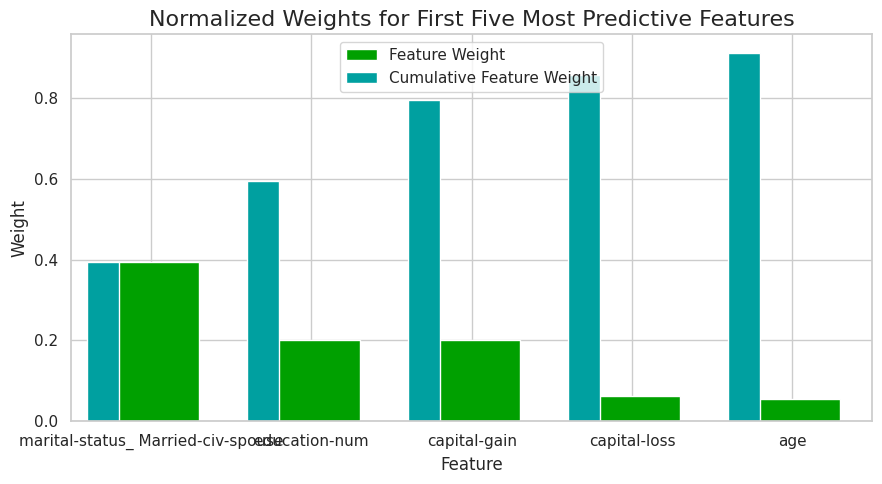

In [24]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=42).fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

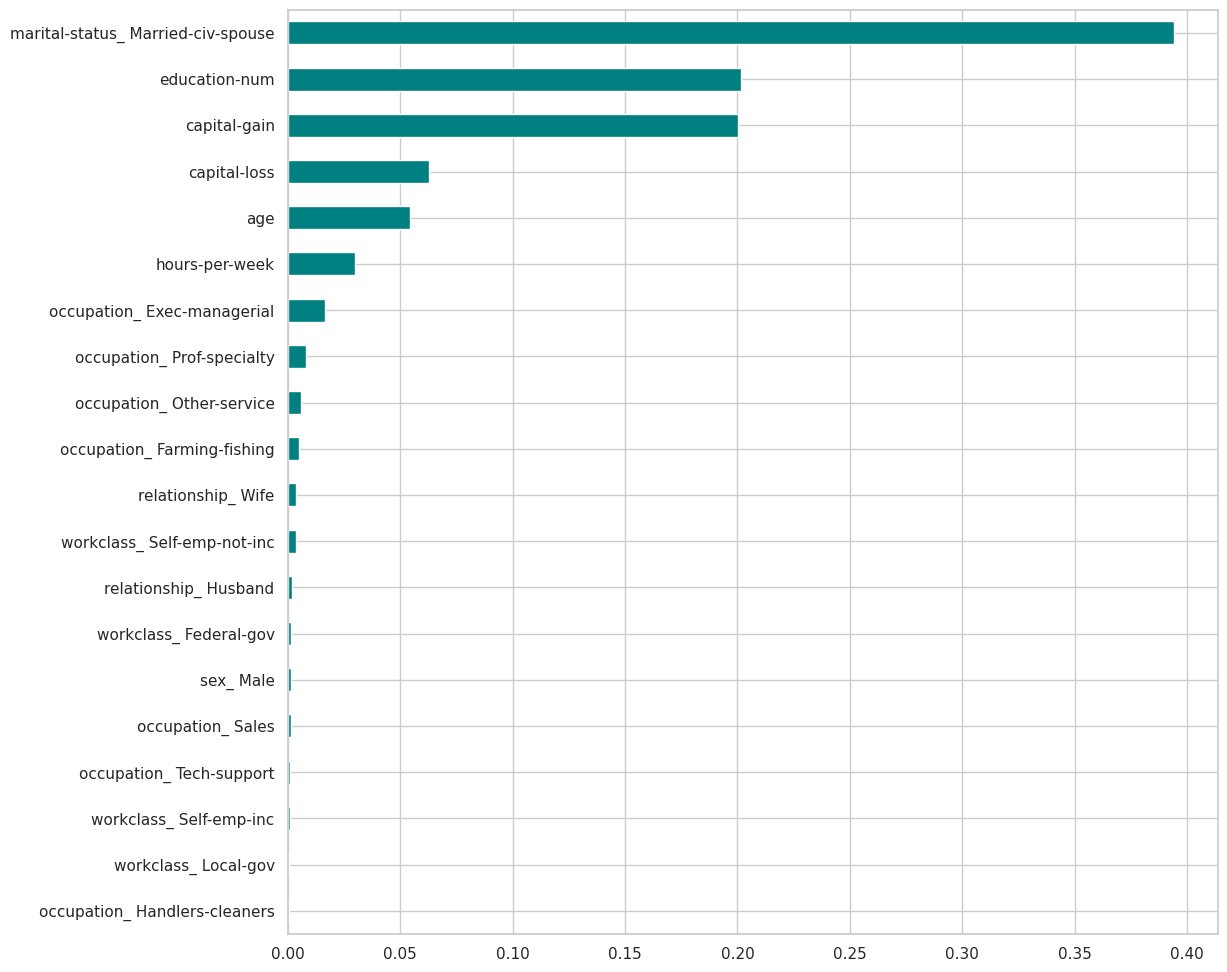

In [25]:
# look at top "n" feature importances to get a better overall understanding of feature impact levels.
n = 20
pd.Series(importances, index=X_train.columns).sort_values()[-n:].plot(kind='barh',figsize=(12,12),color='teal');

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

I was pretty close! I did not predict capital-loss being as strong a feature as capital-gain, but after thinking a little more I should have realized that capital loss is just the other side of the coin of capital gain. Maybe one year their shares go down but the year after the shares go up. The fact that they are making capital gains or losses would reflect higher income earners.

And my first choice of Occupation didn't make the top 5, though all the rest made it (albeit in a different order). I think it makes sense that age, capital gain/loss, hours-per-week, and education-num would have a strong effect as I outlined above, though I would have expected education-num to have had a bigger effect than age.

Another point to note is on this data set the features importances function seems to be giving higher weight preference to numerical rather than categorical data, I don't know if this is just a coincidence but it is something I think that deserves further investigation.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [26]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n < ------ >")
print("Accuracy on testing data -- > {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data -- > {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n < ------ > ")
print("Accuracy on testing data -- > {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data -- > {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
 < ------ >
Accuracy on testing data -- > 0.8715
F-score on testing data -- > 0.7547

Final Model trained on reduced data
 < ------ > 
Accuracy on testing data -- > 0.8584
F-score on testing data -- > 0.7240


In [27]:
#Including the hours per week worked feature, so there are 6 features considered
X_train_6_features = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:6]]]
X_test_6_features = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:6]]]

clf = (clone(best_clf)).fit(X_train_6_features, y_train)

reduced_predictions_2 = clf.predict(X_test_6_features)

print("\nFinal Model trained on reduced data with 6 features\n < ------ > ")
print("Accuracy on testing data -- > {:.4f}".format(accuracy_score(y_test, reduced_predictions_2)))
print("F-score on testing data -- > {:.4f}".format(fbeta_score(y_test, reduced_predictions_2, beta = 0.5)))


Final Model trained on reduced data with 6 features
 < ------ > 
Accuracy on testing data -- > 0.8607
F-score on testing data -- > 0.7296


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

If we use only the top 5 features, we see ***the final model trained using all the features outperforms the top 5 final model***. The **F-score of 0.7547 vs 0.7238 and an accuracy score** of **0.8715 vs 0.8583**, this is a **reduction of 3.09 basis points for F-Score and 1.32 basis points for accuracy score** respectively.

I think it would be important to consult with CharityML to see how sensitive they were to the costs of contacting possible donors and the amount of training time. If we take as an example the population of California in 2017, California as a population of 29.26 million of the age 20 and over. The difference of 3.09 basis points on this population would be 904,000 thousand less possible donor contacts identified as earning above $50k using the F-Score. The training time for only 5 features would be substantial less but not prohibitive, and once trained the Gradient Boosting algorithm is pretty fast for predictions.

One thing further to consider would be to use the top 6 features instead of 5 and also **include hours-per-week**, as we could see from the horizontal bar chart above the 6th feature hours-per-week was also a significant feature in comparison to the 7th onwards. If we add this feature to our final algorithm **we increase the F-Score to 0.7296 and the Accuracy Score to 0.8607**. Using the F-Score this would mean identifying an additional 16,970 possible donors in California in our example above.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [28]:
!jupyter nbconvert --to html finding_donors.ipynb

[NbConvertApp] Converting notebook finding_donors.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 821825 bytes to finding_donors.html
